In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def mean(array):
    return sum(array)/len(array)

def running_mean(x, N):
    out = np.zeros_like(x, dtype=np.float64)
    for i in range(len(x)):
        if N%2 == 0:
            a, b = i - (N-1)//2, i + (N-1)//2 + 2
        else:
            a, b = i - (N-1)//2, i + (N-1)//2 + 1
        a = max(0, a)
        b = min(len(x), b)
        out[i] = np.mean(x[a:b])
    return list(out)

In [3]:
df = pd.read_csv('130.csv', sep=',', 
                 index_col=False, skiprows=[1, 2])
df = df.replace([-999.25], 0)
df

,MD,CALI,CALI.1,DEVI,DTCO,DTCO.1,DTCO.2,DT,DT.1,DTC,...,RHOB.3,RT,TMP,TMP.1,MD.2,TVD,VCL,TVD.1,Unnamed: 56,Unnamed: 57
0,0.0000,25.477953,25.477953,0,0.0,-304.5714,0.0,161.267696,0.0,-304.5714,...,0.000000,0.0,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.000000e+00,0.000000
1,0.1524,25.430553,25.430553,0,0.0,-304.5714,0.0,161.251029,0.0,-304.5714,...,0.000000,0.0,0.000000,0.000000,0.1524,0.1524,0.000000,0.1524,0.000000e+00,0.000000
2,0.3048,25.450613,25.450613,0,0.0,-304.5714,0.0,161.234363,0.0,-304.5714,...,0.000000,0.0,0.000000,0.000000,0.3048,0.3048,0.000000,0.3048,0.000000e+00,0.000000
3,0.4572,25.484761,25.484761,0,0.0,-304.5714,0.0,161.217697,0.0,-304.5714,...,0.000000,0.0,0.000000,0.000000,0.4572,0.4572,0.000000,0.4572,0.000000e+00,0.000000
4,0.6096,25.490850,25.490850,0,0.0,-304.5714,0.0,161.201039,0.0,-304.5714,...,0.000000,0.0,0.000000,0.000000,0.6096,0.6096,0.000000,0.6096,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33558,5114.2392,8.533118,8.533118,0,0.0,0.0000,0.0,0.000000,0.0,0.0000,...,2.645080,0.0,10.846028,42.696168,5114.2392,5114.2392,0.009116,5114.2392,2.881767e+06,102438.320580
33559,5114.3916,8.531618,8.531618,0,0.0,0.0000,0.0,0.000000,0.0,0.0000,...,2.644792,0.0,10.954994,42.778464,5114.3916,5114.3916,0.008750,5114.3916,2.881853e+06,103162.493831
33560,5114.5440,8.532953,8.532953,0,0.0,0.0000,0.0,0.000000,0.0,0.0000,...,2.644828,0.0,11.022200,42.875160,5114.5440,5114.5440,0.008392,5114.5440,2.881939e+06,104030.161462
33561,5114.6964,8.533504,8.533504,0,0.0,0.0000,0.0,0.000000,0.0,0.0000,...,2.644795,0.0,11.029612,42.963056,5114.6964,5114.6964,-4.812106,5114.6964,2.882025e+06,104233.999616


D:\Temp\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


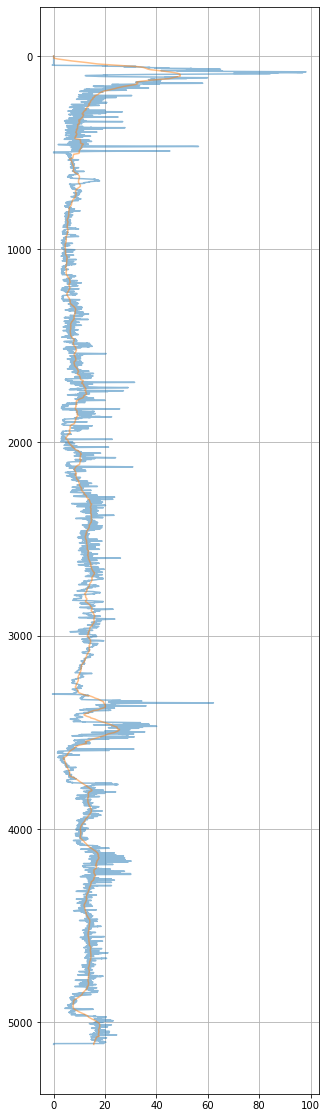

In [4]:
fig, ax = plt.subplots(figsize=(5, 20))

plt.plot(df['RSN'], df['MD'], alpha=0.5)
plt.plot(running_mean(df['RSN'], 500), df['MD'], alpha=0.5)

plt.grid()
ax.invert_yaxis()

fig.show()

In [7]:
step = 100  # шаг по массиву
diff = 5  # при таком расхождении ставится метка интервала

filter_value = 100

data = running_mean(df['RSN'], filter_value)

In [8]:
def func1(data, step, diff):
    all_mean = abs(mean(data))
    
    points = []
    interval = list(data[:step])
    for i in range((len(data) // step) - 1):

        current_interval = list(data[(i+1)*step:(i+2)*step])
        if (abs(mean(current_interval) - mean(interval))/all_mean)*100 < diff:
            interval += current_interval
        else:
            points.append(df['MD'][step*(i)])
            interval = current_interval
            
    return points

In [10]:
points = func1(data, step, diff)

D:\Temp\Anaconda\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


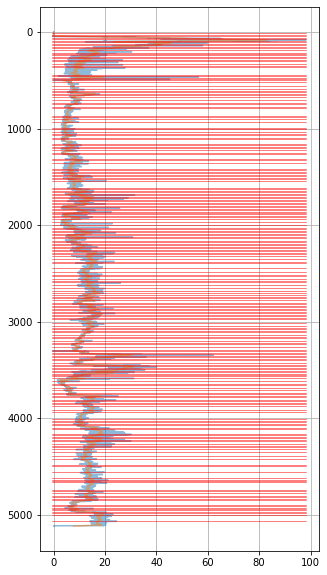

In [11]:
fig, ax = plt.subplots(figsize=(5, 10))

plt.plot(df['RSN'], df['MD'], alpha=0.5)
plt.plot(running_mean(df['RSN'], filter_value), df['MD'], alpha=0.5)

g_max, g_min = max(df['RSN']), min(df['RSN'])
for i in points:
    plt.plot([g_max, g_min], [i, i], linewidth=0.5, c='r')

plt.grid()
ax.invert_yaxis()

fig.show()